In [0]:

# Code to read csv file into colaboratory:# Code  
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'10Xf2Xv_pfnIycH2HpNZR3SwWHiHdrqzX'}) # replace the id with id of file you want to access
downloaded.GetContentFile('handwritten.csv')  

#3. Read file as panda dataframe
import pandas as pd
data = pd.read_csv('handwritten.csv')

In [0]:
!pip install -q keras
!pip install -q numpy
!pip install -q sklearn
!pip install -q matplotlib
!pip install -q pandas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.model_selection import train_test_split

# Load the Data

In [4]:
# Get the data from the csv file
data = data.values
np.random.shuffle(data)

# Split the data into X, Y, and parition the values into the training and test splits
# Reshape X to be in the shape (N, 28, 28)
X, Y = data[:,1:], data[:,0]
# X = X.reshape(X.shape[0], 28, 28)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("Train {} {}".format(X_train.shape, Y_train.shape))
print("Test {} {}".format(X_test.shape, Y_test.shape))

Train (297629, 784) (297629,)
Test (74408, 784) (74408,)


# Data Prep

In [5]:
classes = np.unique(Y_train)
n_classes = len(classes)
print('Total number of outputs : ', n_classes)
print('Output classes : ', classes)

Total number of outputs :  26
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [0]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)

classes = np.unique(Y_train)
num_classes = len(classes)

X_train = X_train.reshape(-1, img_size, img_size, 1)
X_test = X_test.reshape(-1, img_size, img_size, 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

## Normalize Images

In [0]:
mean_image = np.mean(X_train, axis=0).astype(np.int64)
X_train = (X_train - mean_image)/255
X_test = (X_test - mean_image)/255

In [8]:
from keras.utils import to_categorical

Y_train_onehot = to_categorical(Y_train)
Y_test_onehot = to_categorical(Y_test)
print("Original Label: {}".format(Y_train[0]))
print("One Hot Label: {}".format(Y_train_onehot[0]))

Using TensorFlow backend.


Original Label: 17
One Hot Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [9]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train_onehot, test_size=0.2)

print("Train: {} {}".format(X_train.shape, Y_train.shape))
print("Valid: {} {}".format(X_valid.shape, Y_valid.shape))

Train: (238103, 28, 28, 1) (238103, 26)
Valid: (59526, 28, 28, 1) (59526, 26)


# Testing Layers

In [0]:
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.layers import LeakyReLU, ELU
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten

from tensorflow.python.keras import initializers

optimizer = Adam(lr=1e-3)

In [11]:
model = Sequential()

#conv
#keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, 
    #dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
    #bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, 
    #activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
model.add(Conv2D(filters=16, kernel_size=8, strides = 1, padding='same', activation='linear',
                 bias_initializer='zeros', input_shape=(img_size,img_size,1)))

#ReLu
model.add(LeakyReLU(alpha=0.1))

#conv2
model.add(Conv2D(filters=16, kernel_size=8, strides = 2, padding='same', activation='linear',
                 bias_initializer='zeros', input_shape=(img_size,img_size,1)))

#ReLu
model.add(LeakyReLU(alpha=0.1))

#MaxPool
#keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
model.add(MaxPooling2D(strides=2, padding='same'))

#Affine
model.add(Flatten())

#keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
    #bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, 
    #activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
#model.add(Dense(56, activation="relu"))
    
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1040      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        16400     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 26)                20410     
Total para

# Cross Validation

In [0]:
# from sklearn.model_selection import KFold

# k_fold = KFold(n_splits=3)
# best_acc = 0
# best_model = None

# for train_indices, val_indices in k_fold.split(X_train):
#   print("Starting new fold")
#   print(train_indices, val_indices)
  
#   model_train = model.fit(x=X_train[train_indices], y=Y_train_onehot[train_indices],
#                           epochs=3, batch_size=128,verbose=1, 
#                           validation_data=(X_train[val_indices], Y_train_onehot[val_indices]))
  
#   test_eval = model.evaluate(X_test, Y_test_onehot, verbose=0)
#   print('Test loss:', test_eval[0])
#   print('Test accuracy:', test_eval[1])
#   if test_eval[1] > best_acc:
#     best_acc = test_eval[1]
#     best_model = model_train

# print("Best accuracy:", best_acc )
  

#X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train_onehot, test_size=0.2)

#   print("Train: {} {}".format(X_train[train_indices].shape, Y_train[train_indices].shape))
#   print("Valid: {} {}".format(X_train[val_indices].shape, Y_train_onehot.shape))

# Training and Testing

In [13]:
model_train = model.fit(x=X_train,
          y=Y_train,
          epochs=20, batch_size=128,verbose=1, validation_data=(X_valid, Y_valid))

Train on 238103 samples, validate on 59526 samples
Epoch 1/20
238103/238103 [==============================] - 32s 135us/step - loss: 0.2476 - acc: 0.9327 - val_loss: 0.1182 - val_acc: 0.9688
Epoch 2/20
 50432/238103 [=====>........................] - ETA: 22s - loss: 0.1099 - acc: 0.9703

238103/238103 [==============================] - 30s 126us/step - loss: 0.1039 - acc: 0.9726 - val_loss: 0.0960 - val_acc: 0.9750
Epoch 3/20
147456/238103 [=================>............] - ETA: 10s - loss: 0.0848 - acc: 0.9779

238103/238103 [==============================] - 30s 126us/step - loss: 0.0841 - acc: 0.9781 - val_loss: 0.0847 - val_acc: 0.9779
Epoch 4/20
184576/238103 [======================>.......] - ETA: 6s - loss: 0.0717 - acc: 0.9813

238103/238103 [==============================] - 30s 127us/step - loss: 0.0729 - acc: 0.9810 - val_loss: 0.0801 - val_acc: 0.9786
Epoch 5/20
199680/238103 [========================>.....] - ETA: 4s - loss: 0.0653 - acc: 0.9828

238103/238103 [==============================] - 30s 126us/step - loss: 0.0651 - acc: 0.9828 - val_loss: 0.0805 - val_acc: 0.9792
Epoch 6/20
205952/238103 [========================>.....] - ETA: 3s - loss: 0.0582 - acc: 0.9849

238103/238103 [==============================] - 30s 126us/step - loss: 0.0592 - acc: 0.9846 - val_loss: 0.0820 - val_acc: 0.9795
Epoch 7/20
208768/238103 [=========================>....] - ETA: 3s - loss: 0.0540 - acc: 0.9859

238103/238103 [==============================] - 30s 126us/step - loss: 0.0539 - acc: 0.9859 - val_loss: 0.0725 - val_acc: 0.9824
Epoch 8/20
207616/238103 [=========================>....] - ETA: 3s - loss: 0.0498 - acc: 0.9866

238103/238103 [==============================] - 30s 126us/step - loss: 0.0501 - acc: 0.9866 - val_loss: 0.0709 - val_acc: 0.9828
Epoch 9/20
209152/238103 [=========================>....] - ETA: 3s - loss: 0.0455 - acc: 0.9880

238103/238103 [==============================] - 30s 126us/step - loss: 0.0462 - acc: 0.9878 - val_loss: 0.0677 - val_acc: 0.9835
Epoch 10/20
206976/238103 [=========================>....] - ETA: 3s - loss: 0.0432 - acc: 0.9885

238103/238103 [==============================] - 30s 127us/step - loss: 0.0438 - acc: 0.9883 - val_loss: 0.0690 - val_acc: 0.9837
Epoch 11/20
206336/238103 [========================>.....] - ETA: 3s - loss: 0.0394 - acc: 0.9895

238103/238103 [==============================] - 30s 126us/step - loss: 0.0404 - acc: 0.9893 - val_loss: 0.0730 - val_acc: 0.9826
Epoch 12/20
207232/238103 [=========================>....] - ETA: 3s - loss: 0.0376 - acc: 0.9899

238103/238103 [==============================] - 30s 126us/step - loss: 0.0380 - acc: 0.9899 - val_loss: 0.0687 - val_acc: 0.9840
Epoch 13/20
206336/238103 [========================>.....] - ETA: 3s - loss: 0.0350 - acc: 0.9905

238103/238103 [==============================] - 30s 127us/step - loss: 0.0357 - acc: 0.9904 - val_loss: 0.0691 - val_acc: 0.9843
Epoch 14/20
207104/238103 [=========================>....] - ETA: 3s - loss: 0.0339 - acc: 0.9908

238103/238103 [==============================] - 30s 126us/step - loss: 0.0342 - acc: 0.9907 - val_loss: 0.0685 - val_acc: 0.9845
Epoch 15/20
206592/238103 [=========================>....] - ETA: 3s - loss: 0.0318 - acc: 0.9915

238103/238103 [==============================] - 30s 126us/step - loss: 0.0323 - acc: 0.9915 - val_loss: 0.0717 - val_acc: 0.9837
Epoch 16/20
205056/238103 [========================>.....] - ETA: 3s - loss: 0.0296 - acc: 0.9920

238103/238103 [==============================] - 30s 127us/step - loss: 0.0304 - acc: 0.9918 - val_loss: 0.0693 - val_acc: 0.9851
Epoch 17/20
207232/238103 [=========================>....] - ETA: 3s - loss: 0.0298 - acc: 0.9919

238103/238103 [==============================] - 30s 126us/step - loss: 0.0297 - acc: 0.9920 - val_loss: 0.0708 - val_acc: 0.9850
Epoch 18/20
208384/238103 [=========================>....] - ETA: 3s - loss: 0.0278 - acc: 0.9923

238103/238103 [==============================] - 30s 126us/step - loss: 0.0285 - acc: 0.9922 - val_loss: 0.0730 - val_acc: 0.9848
Epoch 19/20
208384/238103 [=========================>....] - ETA: 3s - loss: 0.0274 - acc: 0.9925

238103/238103 [==============================] - 30s 126us/step - loss: 0.0270 - acc: 0.9925 - val_loss: 0.0716 - val_acc: 0.9856
Epoch 20/20
207360/238103 [=========================>....] - ETA: 3s - loss: 0.0260 - acc: 0.9933

238103/238103 [==============================] - 30s 126us/step - loss: 0.0262 - acc: 0.9932 - val_loss: 0.0741 - val_acc: 0.9845


In [14]:
test_eval = model.evaluate(X_test, Y_test_onehot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.07262620935827856
Test accuracy: 0.9841549295774648


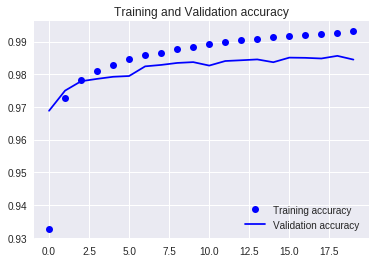

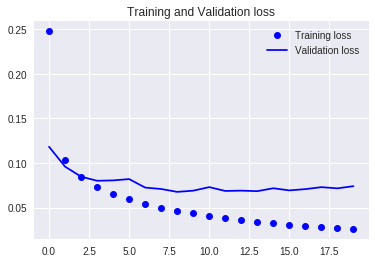

In [15]:

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()